In [1]:
import numpy as np
import pandas as pd
from pprint import pprint
import math
import matplotlib.pyplot as plt

In [95]:
data = pd.read_csv("resources/dataset_train.csv")
data.head(5)

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98


In [96]:
data = data.fillna(data.mean())
data.head(5)

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405,-26.89
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425,-113.45
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265,30.42
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675,200.64
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,60158.0,436.775204,-7.820623,-0.387863,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730,157.98


In [97]:
column_list = list(data.columns)
column_list

['Index',
 'Hogwarts House',
 'First Name',
 'Last Name',
 'Birthday',
 'Best Hand',
 'Arithmancy',
 'Astronomy',
 'Herbology',
 'Defense Against the Dark Arts',
 'Divination',
 'Muggle Studies',
 'Ancient Runes',
 'History of Magic',
 'Transfiguration',
 'Potions',
 'Care of Magical Creatures',
 'Charms',
 'Flying']

In [98]:
for name in column_list[6:19] :
    data[name] = (data[name] - data[name].mean()) / (data[name].max() - data[name].min())
data.head(5)

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,0.067654,-0.266110,0.209332,2.656001e-01,0.083591,0.227927,0.079597,0.109306,0.050389,-0.118459,0.120775,0.297028,-0.106067
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,0.136124,-0.298473,-0.325374,2.979632e-01,-0.467291,-0.120589,-0.277314,0.055140,0.149990,0.071205,0.022778,-0.247323,-0.294020
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,-0.200521,-0.204681,0.300522,2.041715e-01,0.159182,0.408229,0.231487,0.028555,0.301519,0.152359,-0.072509,0.450068,0.018374
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,-0.131200,0.331801,-0.348642,-3.323108e-01,0.046489,-0.143381,0.061176,-0.374613,-0.570400,-0.281254,0.006183,-0.378216,0.387984
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,0.081371,0.200195,-0.409048,2.799419e-18,-0.048932,-0.100819,0.224422,-0.308813,-0.481785,-0.089903,-0.033067,-0.365317,0.295353


In [16]:
df = data[column_list[6:18]]
df.head(5)

,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms
0,58384.0,-487.886086,5.727180,4.878861,4.722,272.035831,532.484226,5.231058,1039.788281,3.790369,0.715939,-232.79405
1,67239.0,-552.060507,-5.987446,5.520605,-5.612,-487.340557,367.760303,4.107170,1058.944592,7.248742,0.091674,-252.18425
2,23702.0,-366.076117,7.725017,3.660761,6.140,664.893521,602.585284,3.555579,1088.088348,8.728531,-0.515327,-227.34265
3,32667.0,697.742809,-6.497214,-6.977428,4.026,-537.001128,523.982133,-4.809637,920.391449,0.821911,-0.014040,-256.84675
4,60158.0,436.775204,-7.820623,NaN,2.236,-444.262537,599.324514,-3.444377,937.434724,4.311066,-0.264070,-256.38730


In [99]:
def visualize_scatter(x, y, color):
    fig = plt.figure()
    ax = plt.axes()
    ax.scatter(x, y, c=color)
    #plt.plot(x, x * slop + intercept, 'b', linewidth=0.2)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.title('Figure 2: Training data with decision boundary')
    plt.show()


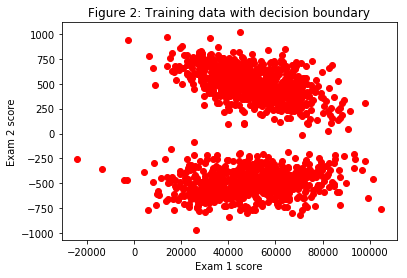

In [100]:
visualize_scatter(df['Arithmancy'], df['Astronomy'],"red")

In [101]:
def visualize_regr(x, y, theta):
    fig = plt.figure()
    ax = plt.axes()
    est = theta[0] + (x*theta[1])
    #print(est.shape)
    #print(x)
    #plt.gca().set(   xlim=(min(x), max(x)), ylim=(min(y), max(y))   )
    ax.scatter(x, y, c="red")
    plt.plot(x, est, 'blue', linewidth=0.5)
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.title('Figure 2: Training data with decision boundary')
    plt.show()


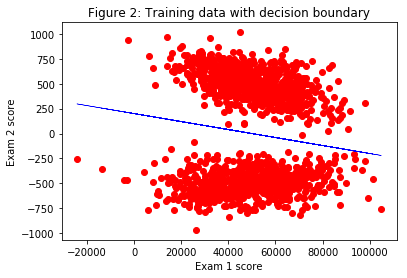

In [102]:
visualize_regr(df['Arithmancy'], df['Astronomy'], [200, -0.004])

/Users/agnieszkaslusarczyk/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/agnieszkaslusarczyk/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([  2.,   3.,  20., 117., 304., 474., 397., 186.,  54.,   9.]),
 array([-24370. , -11437.4,   1495.2,  14427.8,  27360.4,  40293. ,
         53225.6,  66158.2,  79090.8,  92023.4, 104956. ]),
 <a list of 10 Patch objects>)

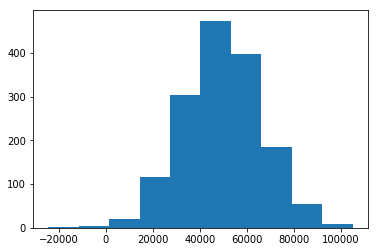

In [103]:
plt.hist(df['Arithmancy'], bins=10)

In [79]:
# Import Data
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")
df.head(5)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [77]:
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

In [ ]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.distplot(df.loc[df['class'] == 'compact', 'cty'], color="dodgerblue", label="Compact", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'suv', 'cty'], color="orange", label="SUV", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['class'] == 'minivan', 'cty'], color="g", label="minivan", hist_kws={'alpha':.7}, kde_kws={'linewidth':3})
plt.ylim(0, 0.35)

# Decoration
plt.title('Density Plot of City Mileage by Vehicle Type', fontsize=22)
plt.legend()
plt.show()

In [104]:
df = data
df.head(10)

,Index,Hogwarts House,First Name,Last Name,Birthday,Best Hand,Arithmancy,Astronomy,Herbology,Defense Against the Dark Arts,Divination,Muggle Studies,Ancient Runes,History of Magic,Transfiguration,Potions,Care of Magical Creatures,Charms,Flying
0,0,Ravenclaw,Tamara,Hsu,2000-03-30,Left,0.067654,-0.266110,0.209332,2.656001e-01,0.083591,0.227927,0.079597,0.109306,0.050389,-0.118459,0.120775,0.297028,-0.106067
1,1,Slytherin,Erich,Paredes,1999-10-14,Right,0.136124,-0.298473,-0.325374,2.979632e-01,-0.467291,-0.120589,-0.277314,0.055140,0.149990,0.071205,0.022778,-0.247323,-0.294020
2,2,Ravenclaw,Stephany,Braun,1999-11-03,Left,-0.200521,-0.204681,0.300522,2.041715e-01,0.159182,0.408229,0.231487,0.028555,0.301519,0.152359,-0.072509,0.450068,0.018374
3,3,Gryffindor,Vesta,Mcmichael,2000-08-19,Left,-0.131200,0.331801,-0.348642,-3.323108e-01,0.046489,-0.143381,0.061176,-0.374613,-0.570400,-0.281254,0.006183,-0.378216,0.387984
4,4,Gryffindor,Gaston,Gibbs,1998-09-27,Left,0.081371,0.200195,-0.409048,2.799419e-18,-0.048932,-0.100819,0.224422,-0.308813,-0.481785,-0.089903,-0.033067,-0.365317,0.295353
5,5,Slytherin,Corrine,Hammond,1999-04-04,Right,-0.219798,-0.329551,-0.247858,3.290414e-01,-0.519532,-0.099320,-0.215689,0.116498,0.118276,0.318129,0.173200,-0.128326,-0.123003
6,6,Gryffindor,Tom,Guido,2000-09-30,Left,-0.003615,0.296653,-0.274002,-2.971628e-01,0.000000,-0.322322,0.190660,-0.495722,-0.554032,-0.236023,0.032408,-0.405945,0.520241
7,7,Hufflepuff,Alicia,Hayward,1997-07-08,Right,-0.128548,0.187405,0.218673,-1.879149e-01,-0.020519,-0.127327,-0.122196,0.000000,0.057167,0.034628,-0.018567,-0.018543,0.109202
8,8,Gryffindor,Bella,Leatherman,1998-12-07,Left,-0.226997,0.230262,-0.290157,-2.307713e-01,0.143989,-0.184481,0.156209,-0.441558,-0.545110,-0.266743,0.188448,-0.249888,0.482373
9,9,Hufflepuff,Hayden,Aponte,2001-10-13,Right,-0.025661,0.245793,0.309522,-2.463030e-01,0.010773,-0.079633,-0.334265,0.097140,0.058845,-0.212871,-0.074746,-0.033712,-0.047874


### V.2.1 Histogram

Faites un script nommé histogram.[extension] qui affiche un histogram répondant
à la question suivante :
Quel cours de Poudlard a une répartition des notes homogènes entre les quatres maisons ?

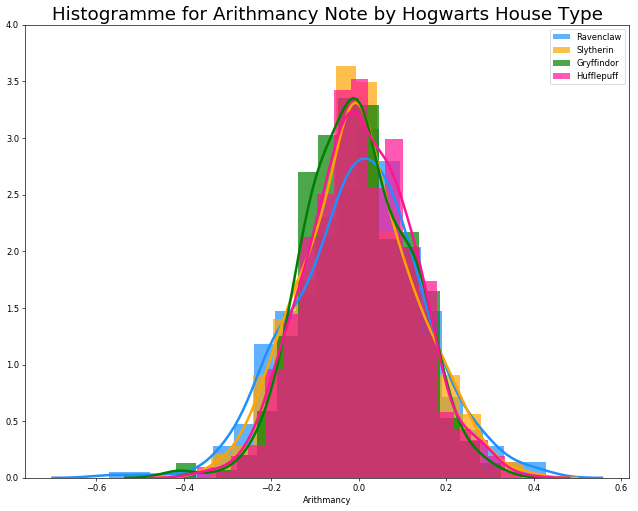

In [118]:
# Draw Plot
plt.figure(figsize=(13,10), dpi= 60)
sns.distplot(df.loc[df['Hogwarts House'] == 'Ravenclaw', 'Arithmancy'], color="dodgerblue", la    bel="Ravenclaw", hist_kws={'alpha':0.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['Hogwarts House'] == 'Slytherin', 'Arithmancy'], color="orange", label="Slytherin", hist_kws={'alpha':0.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['Hogwarts House'] == 'Gryffindor', 'Arithmancy'], color="g", label="Gryffindor", hist_kws={'alpha':0.7}, kde_kws={'linewidth':3})
sns.distplot(df.loc[df['Hogwarts House'] == 'Hufflepuff', 'Arithmancy'], color="deeppink", label="Hufflepuff", hist_kws={'alpha':0.7}, kde_kws={'linewidth':3})

plt.ylim(0, 4)

# Decoration
plt.title('Histogramme for Arithmancy Note by Hogwarts House Type', fontsize=22)
plt.legend()
plt.show()

In [125]:
def hist (name):
    # Draw Plot
    plt.figure(figsize=(13,10), dpi= 60)
    sns.distplot(df.loc[df['Hogwarts House'] == 'Ravenclaw', name], color="dodgerblue", label="Ravenclaw", hist_kws={'alpha':0.7}, kde_kws={'linewidth':3})
    sns.distplot(df.loc[df['Hogwarts House'] == 'Slytherin', name], color="orange", label="Slytherin", hist_kws={'alpha':0.7}, kde_kws={'linewidth':3})
    sns.distplot(df.loc[df['Hogwarts House'] == 'Gryffindor', name], color="g", label="Gryffindor", hist_kws={'alpha':0.7}, kde_kws={'linewidth':3})
    sns.distplot(df.loc[df['Hogwarts House'] == 'Hufflepuff', name], color="deeppink", label="Hufflepuff", hist_kws={'alpha':0.7}, kde_kws={'linewidth':3})

    plt.ylim(0, 6)

    # Decoration
    plt.title('Histogramme for '+name+' Note by Hogwarts House Type', fontsize=22)
    plt.legend()
    plt.show()

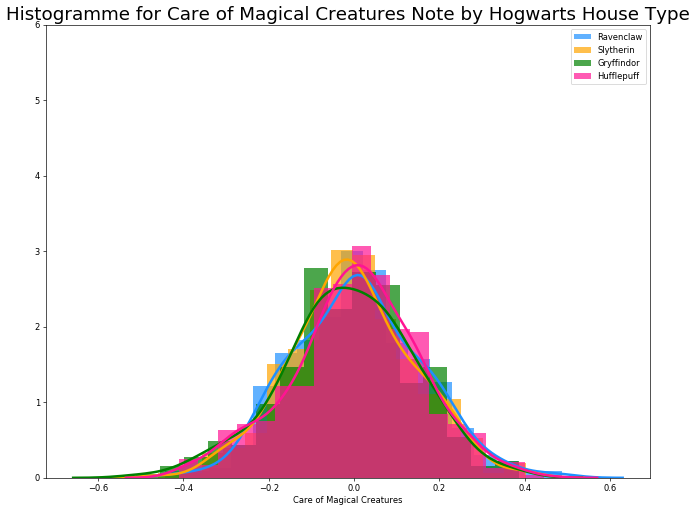

In [131]:
#for name in columns_list :
hist ('Care of Magical Creatures')

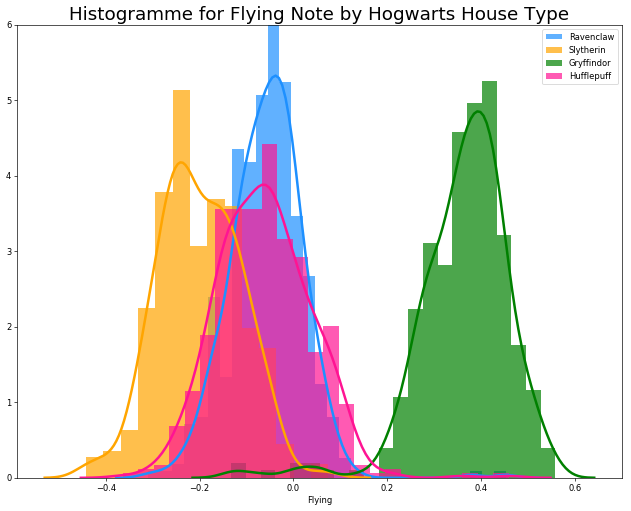

In [133]:
hist("Flying")

Arithmancy


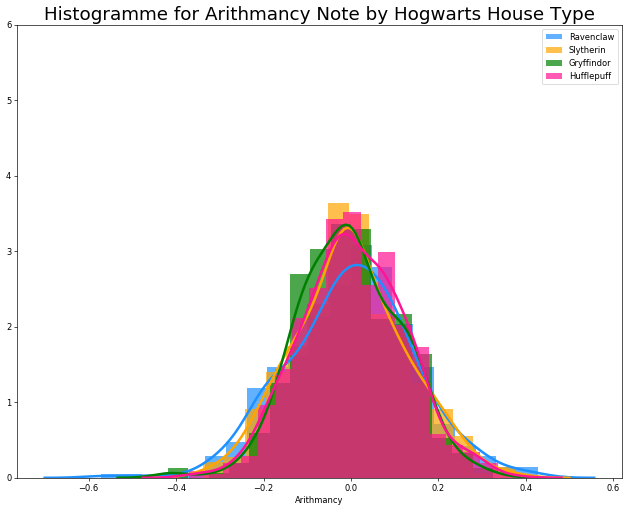

Astronomy


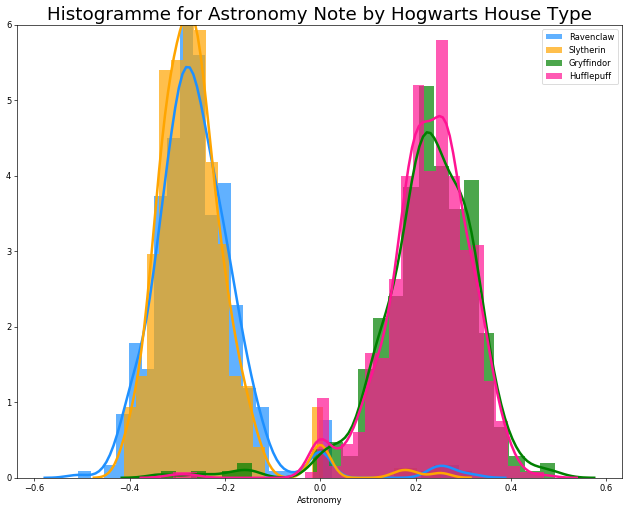

Herbology


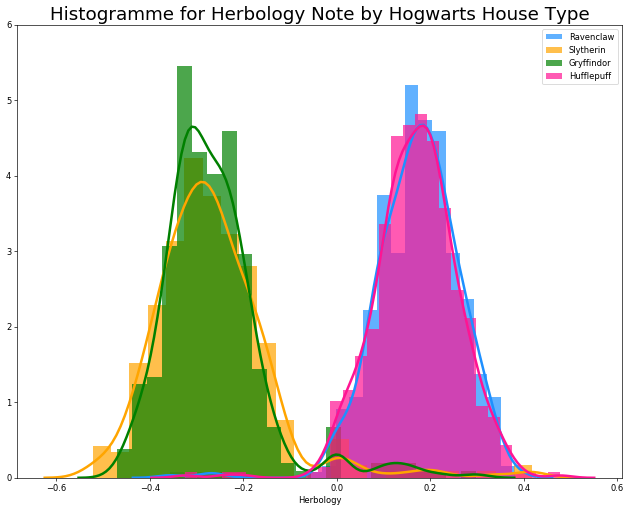

Defense Against the Dark Arts


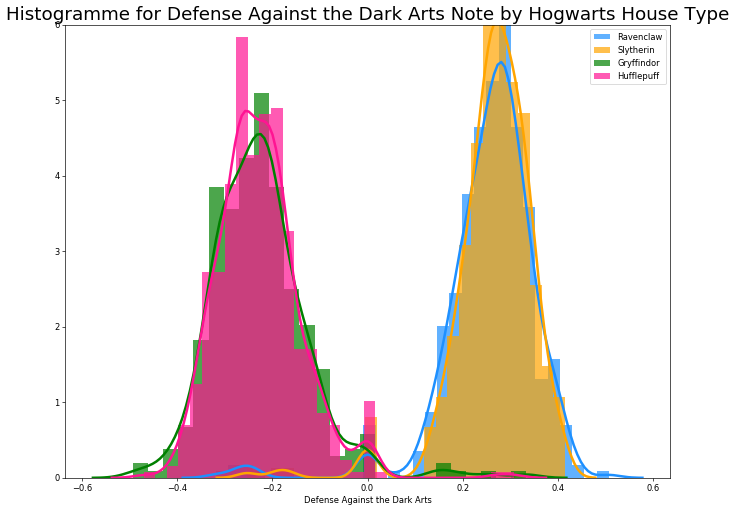

Divination


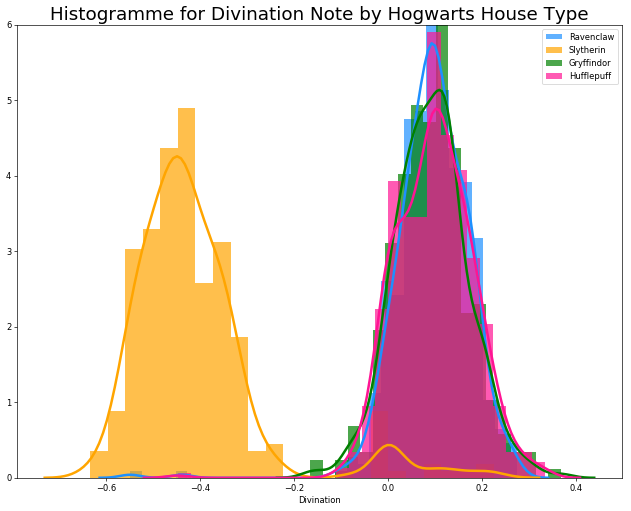

Muggle Studies


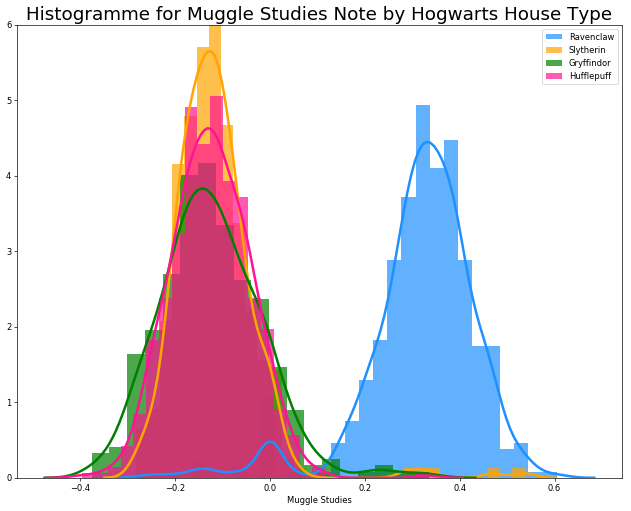

Ancient Runes


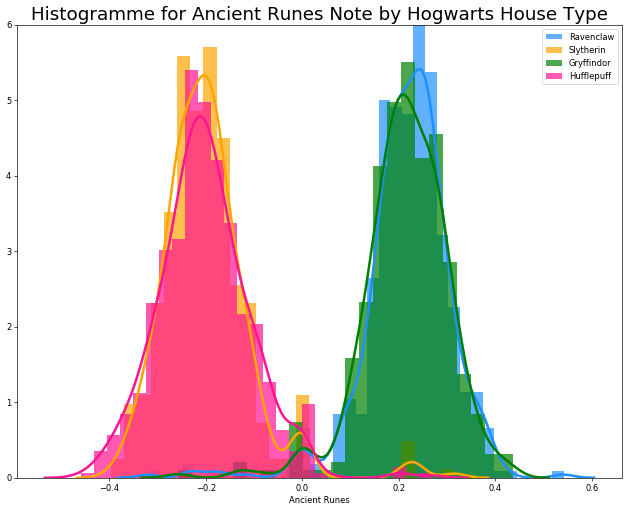

History of Magic


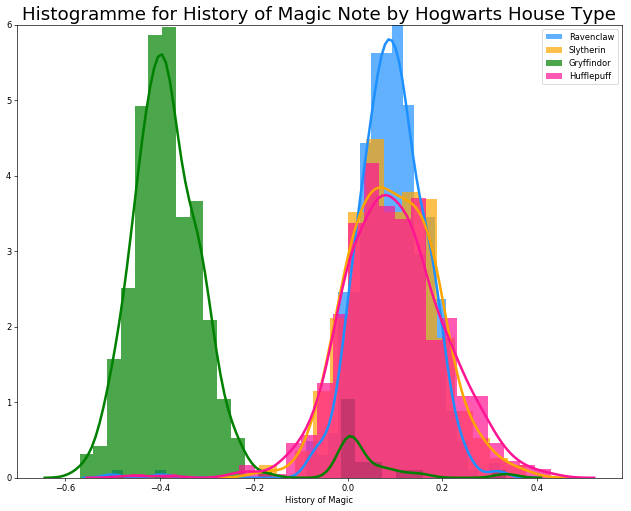

Transfiguration


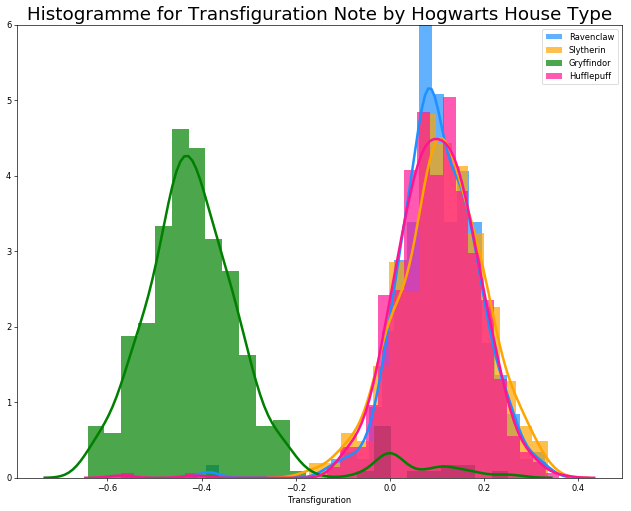

Potions


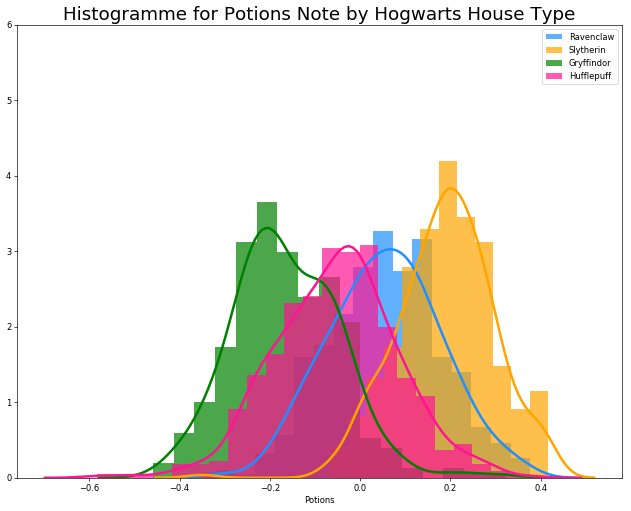

Care of Magical Creatures


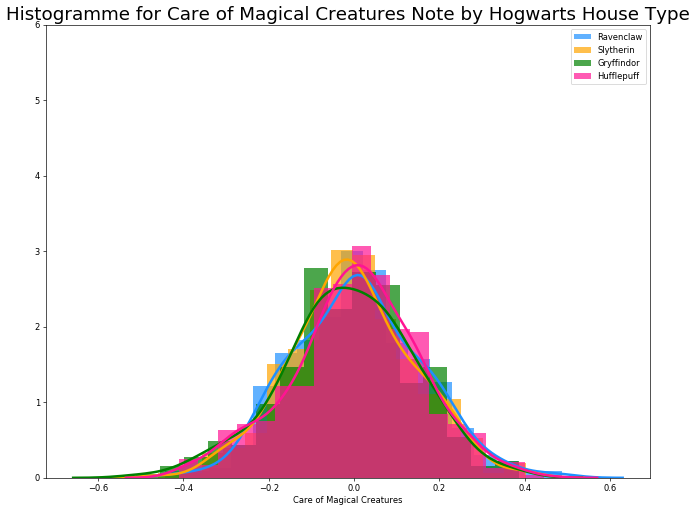

Charms


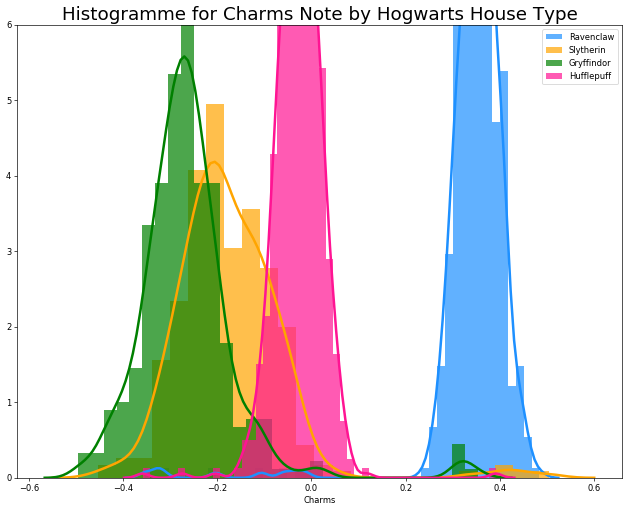

Flying


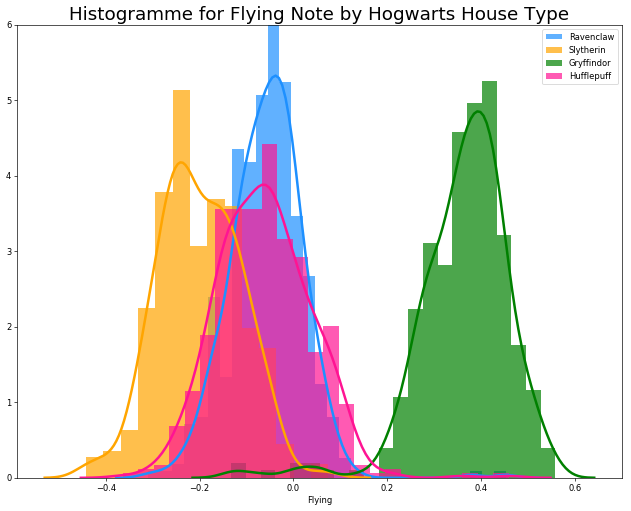

In [137]:
for name in column_list[6:19] :
    print(name)
    cours = data[name]
    hist(name)

### V.2.2 Scatter plot

Faites un script nommé scatter_plot.[extension] qui affiche un scatter plot répondant à la question suivante :
Quelles sont les deux features qui sont semblables ?

### V.2.3 Pair plot

Faites un script nommé pair_plot.[extension] qui affiche un pair plot ou scatter
plot matrix (selon la librairie graphique que vous utiliserez).
À partir de cette visualisation, quelles caractéristiques allez-vous utiliser pour entraîner votre prochaine régression logistique ?